In [1]:
from itertools import product
import numpy as np
import pandas as pd
from ADRprofilePrediction import Pairs2Mat, evaluation
from Models import loadHyperpar
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as path_effects

In [2]:
import sklearn
print(sklearn.__version__)

0.24.2


In [3]:
# drug_target_mat = Pairs2Mat(path="data/drug_target.tsv",colname1="0",colname2="1")
# drug_enzyme_mat = Pairs2Mat(path="data/drug_enzyme.tsv",colname1="0",colname2="1")
# drug_Chem_mat = pd.read_csv("data/drug_chemsfp.tsv",sep = "\t",header=0,index_col=0)
# DGI_mat = Pairs2Mat(path="data/interactions.tsv",colname1="drug_claim_name",colname2="gene_name")
# # DGI_mat2 = pd.read_csv("data/intersection_DGIdb_mat.tsv",sep = "\t",header=0,index_col=0)
# drug_transporter_mat = Pairs2Mat(path="data/drug_transporter.tsv",colname1="0",colname2="1")
# drug_pathway_mat = Pairs2Mat(path="data/drug_pathway.tsv",colname1="0",colname2="1")
# drug_indication_mat = Pairs2Mat(path="data/drug_indication.tsv",colname1="1_x",colname2="6")

# SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
# # drug_sideeffect_mat = Pairs2Mat(path="data/side-effect-and-drug_name_upper.tsv",colname1="drugbank_name",colname2="side_effect_name")
# OFFSIDES = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")

In [4]:
features_dict = {
    "target":Pairs2Mat(path="data/drug_target.tsv",colname1="0",colname2="1"),
    "enzyme":Pairs2Mat(path="data/drug_enzyme.tsv",colname1="0",colname2="1"),
    "Chem":pd.read_csv("data/drug_chemsfp.tsv",sep = "\t",header=0,index_col=0),
    "DGI":Pairs2Mat(path="data/interactions.tsv",colname1="drug_claim_name",colname2="gene_name"),
    "transporter":Pairs2Mat(path="data/drug_transporter.tsv",colname1="0",colname2="1"),
    "pathway":Pairs2Mat(path="data/drug_pathway.tsv",colname1="0",colname2="1"),
    "indication":Pairs2Mat(path="data/drug_indication.tsv",colname1="1_x",colname2="6")
}


In [5]:
# SEs = {}
# SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
# column_sums = np.sum(SIDER, axis=0)
# SEs["SIDER"] = SIDER.loc[:, column_sums >= 5]
SEs = {}
SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
column_sums = np.sum(SIDER, axis=0)
SEs["SIDER"] = SIDER.loc[:, (column_sums < 150)]

# OFFSIDERS = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")
# column_sums = np.sum(OFFSIDERS, axis=0)
# SEs["OFFSIDES"] = OFFSIDERS.loc[:, column_sums >= 5]

# SEs = {}
# SEs["SIDER"] = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
# SEs["OFFSIDES"] = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")

In [6]:
SEs["SIDER"].shape

(1344, 5481)

In [7]:
features_names = ["target", "enzyme", "Chem", "DGI", "transporter", "pathway", "indication"]
SE_names = ["SIDER", "OFFSIDES"]
methods = ["SKR", "KR", "KRR", "Naive", "LNSM_RLN", "LNSM_jaccard", "VKR"]
# methods = ["SKR", "KR", "KRR", "Naive", "LNSM_RLN", "LNSM_jaccard", "VKR", "SVM", "OCCA", "SCCA", "RF", "BRF"]
tuning_metrices=["AUROC", "AUPR", "AUROCperdrug", "AUPRperdrug"]
# metrice_names = ["AUROC", "AUPR", "F1", "AUROCperdrug", "AUPRperdrug", "F1perdrug", "adjF1"]

In [8]:
A = 10**np.arange(-2, 3, 1, dtype=float)
B = np.arange(0, 1, 0.1, dtype=float)
C = np.arange(5, 20, 5, dtype=int)
D = np.arange(1, 2, 1, dtype=float)
all_hyperparlist = {
    "SKR":[A,B,A,A], 
    "KR":[A,A], 
    "KRR":[A,A],
    "Naive":[], 
    "LNSM_RLN":[B], 
    "LNSM_jaccard":[B], 
    "VKR":[A,A,C], 
    "SVM":[A,A,A], 
    "OCCA":[], 
    "SCCA":[A], 
    "RF":[C], 
    "BRF":[C]
}

In [9]:
metrice = "AUPR"

In [10]:
hyperpars = {}
hyperpars["nested_cv"] = {}
hyperpars["cv"] = {}
hyperparsOut = {}
hyperparsOut["nested_cv"] = {}
hyperparsOut["cv"] = {}
results = {}
results["nested_cv"] = {}
results["cv"] = {}

In [11]:
hyperpars["nested_cv"]["SKR"] = {}
hyperpars["nested_cv"]["SKR"]["target"] = [
    (0.01, 0.4, 10, 100),
    (0.01, 0.4, 10, 100),
    (0.01, 0.4, 10, 100),
    (0.01, 0.5, 10, 100),
    (0.01, 0.4, 10, 100),
    ]
hyperpars["nested_cv"]["SKR"]["enzyme"] = [
    (0.01, 0.6, 10, 100),
    (1, 0.8, 10, 100),
    (1, 0.2, 10, 100),
    (1, 0.2, 10, 100),
    (1, 0.2, 10, 100),
    ]
hyperpars["nested_cv"]["SKR"]["Chem"] = [
    (1, 0.3, 10, 100),
    (1, 0.3, 10, 100),
    (1, 0.3, 10, 100),
    (1, 0.3, 10, 100),
    (1, 0.3, 10, 100),
    ]
hyperpars["nested_cv"]["SKR"]["DGI"] = [
    (0.1, 0.2, 10, 100),
    (0.1, 0.2, 10, 100),
    (0.1, 0.2, 10, 100),
    (0.1, 0.1, 10, 100),
    (0.1, 0.2, 10, 100),
    ]
hyperpars["nested_cv"]["SKR"]["transporter"] = [
    (1, 0.3, 10, 1),
    (1, 0.1, 10, 100),
    (0.1, 0.5, 10, 100),
    (0.1, 0.5, 10, 100),
    (0.1, 0.5, 10, 100),
    ]
hyperpars["nested_cv"]["SKR"]["pathway"] = [
    (0.01, 0.3, 10, 100),
    (0.01, 0.3, 10, 100),
    (0.01, 0.3, 10, 100),
    (0.01, 0.3, 10, 100),
    (0.01, 0.3, 10, 100),
    ]
hyperpars["nested_cv"]["SKR"]["indication"] = [
    (0.1, 0.1, 10, 100),
    (0.1, 0.1, 10, 100),
    (0.1, 0.1, 10, 100),
    (0.1, 0.1, 10, 100),
    (0.1, 0.1, 10, 100),
    ]

In [12]:
hyperpars["nested_cv"]["KRR"] = {}
hyperpars["nested_cv"]["KRR"]["target"] = [
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["enzyme"] = [
    (1, 10),
    (10, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["Chem"] = [
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["DGI"] = [
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["transporter"] = [
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["pathway"] = [
    (0.01, 10),
    (0.01, 10),
    (0.01, 10),
    (0.01, 10),
    (0.01, 10),
    ]
hyperpars["nested_cv"]["KRR"]["indication"] = [
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    ]

In [13]:
hyperpars["nested_cv"]["VKR"] = {}
hyperpars["nested_cv"]["VKR"]["target"] = [
    (10, 0.1, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    ]
hyperpars["nested_cv"]["VKR"]["enzyme"] = [
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    ]
hyperpars["nested_cv"]["VKR"]["Chem"] = [
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    ]
hyperpars["nested_cv"]["VKR"]["DGI"] = [
    (10, 0.1, 15),
    (10, 0.1, 10),
    (10, 0.1, 15),
    (10, 0.01, 15),
    (10, 0.1, 15),
    ]
hyperpars["nested_cv"]["VKR"]["transporter"] = [
    (10, 1, 15),
    (10, 1, 15),
    (10, 1, 15),
    (10, 0.1, 15),
    (10, 0.1, 15),
    ]
hyperpars["nested_cv"]["VKR"]["pathway"] = [
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    ]
hyperpars["nested_cv"]["VKR"]["indication"] = [
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    (10, 0.01, 15),
    ]

In [14]:
method = "SKR"
validation = "nested_cv"
hyperparsOut[validation][method] = {}
results[validation][method] = {}
for str in features_names:
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[validation][method][str], hyperparsOut[validation][method][str] = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation,n_jobs=1)

using feature target
The SKR requires hyperparameter lambda, c, sigma_X, sigma_Y


---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  1250
first few training idx:  [116 159 182 247 255 281 435 618 622 656]
first few testing idx:  [ 23 189 261 291 396 400 476 604 649 690]
--- tuning end ---
target size: 138
------ best hyper pars:  (0.01, 0.4, 10, 100) ------
SKR starts:
SKR ends:
-----------
AUPRperdrug: 0.09901261079785018
AUROCperdrug: 0.773763646126857
AUPR+AUROCperdrug: 0.8727762569247072
AUPR: 0.048708768719136736
AUROC: 0.7365719741328659
AUPR+AUROC: 0.7852807428520027
-----------
Fold: 1
number of hyperpars combination:  1250
first few training idx:  [ 23 189 261 291 396 400 476 604 649 690]
first few testing idx:  [116 159 182 247 255 281 435 618 622 656]
--- tuning end ---
target size: 138
------ best hyper pars:  (0.01, 0.4, 10, 100) ------
SKR starts:
SKR ends:
-----------
AUPRperdrug: 0.12328826353183282
AUROCperdrug: 0.7770977355108829
AUPR+AUROCperdrug: 0.9003859990427158
AUPR: 0.09327718180348722
AUROC: 0.7248437991281117
A

In [15]:
method = "KRR"
validation = "nested_cv"
hyperparsOut[validation][method] = {}
results[validation][method] = {}
for str in features_names:
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[validation][method][str], hyperparsOut[validation][method][str] = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation, n_jobs=1)

using feature target
The KRR requires hyperparameter lambda, sigma_X
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  25
first few training idx:  [116 159 182 247 255 281 435 618 622 656]
first few testing idx:  [ 23 189 261 291 396 400 476 604 649 690]
--- tuning end ---
target size: 138
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.09112796008001833
AUROCperdrug: 0.7783013096542558
AUPR+AUROCperdrug: 0.8694292697342741
AUPR: 0.04251593157402686
AUROC: 0.7401260837517855
AUPR+AUROC: 0.7826420153258123
-----------
Fold: 1
number of hyperpars combination:  25
first few training idx:  [ 23 189 261 291 396 400 476 604 649 690]
first few testing idx:  [116 159 182 247 255 281 435 618 622 656]
--- tuning end ---
target size: 138
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.13091483540534724
AUROCperdrug: 0.7834305673613574
AUPR+AUROCperdrug: 0.9143454027667046
AUPR: 0.08

In [16]:
method = "VKR"
validation = "nested_cv"
hyperparsOut[validation][method] = {}
results[validation][method] = {}
for str in features_names:
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[validation][method][str], hyperparsOut[validation][method][str] = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation,n_jobs=1)

using feature target
The VKR requires hyperparameter lambda, sigma_X, k
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  75
first few training idx:  [116 159 182 247 255 281 435 618 622 656]
first few testing idx:  [ 23 189 261 291 396 400 476 604 649 690]
--- tuning end ---
target size: 138
------ best hyper pars:  (10, 0.1, 15) ------
VKR starts:
VKR ends:
-----------
AUPRperdrug: 0.04148390853448479
AUROCperdrug: 0.7594264766555661
AUPR+AUROCperdrug: 0.8009103851900509
AUPR: 0.02983421681293104
AUROC: 0.7571624499228056
AUPR+AUROC: 0.7869966667357366
-----------
Fold: 1
number of hyperpars combination:  75
first few training idx:  [ 23 189 261 291 396 400 476 604 649 690]
first few testing idx:  [116 159 182 247 255 281 435 618 622 656]
--- tuning end ---
target size: 138
------ best hyper pars:  (10, 0.01, 15) ------
VKR starts:
VKR ends:
-----------
AUPRperdrug: 0.05735718566287031
AUROCperdrug: 0.7557648266200714
AUPR+AUROCperdrug: 0.813122012282941

In [17]:
df = pd.DataFrame()
for m, fs in results["nested_cv"].items():
    for f, mes in fs.items():
        for me, scores in mes.items():
            temp_df = pd.DataFrame({
                'method': m,
                'feature': f,
                'metric': me,
                "score": scores
            })
            df = pd.concat([df, temp_df], ignore_index=True)

print(df)

    method     feature       metric     score
0      SKR      target  AUPRperdrug  0.099013
1      SKR      target  AUPRperdrug  0.123288
2      SKR      target  AUPRperdrug  0.079365
3      SKR      target  AUPRperdrug  0.113320
4      SKR      target  AUPRperdrug  0.121661
..     ...         ...          ...       ...
625    VKR  indication   AUPR+AUROC  0.789911
626    VKR  indication   AUPR+AUROC  0.828286
627    VKR  indication   AUPR+AUROC  0.765954
628    VKR  indication   AUPR+AUROC  0.837073
629    VKR  indication   AUPR+AUROC  0.776423

[630 rows x 4 columns]


In [18]:
# Convert the 'Label' column to a categorical type with the 
custom_order = ["pathway","Chem", "DGI",  "indication", "target", "transporter", "enzyme"]
df['feature'] = pd.Categorical(df['feature'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'Label' column
df_sorted = df.sort_values('feature')

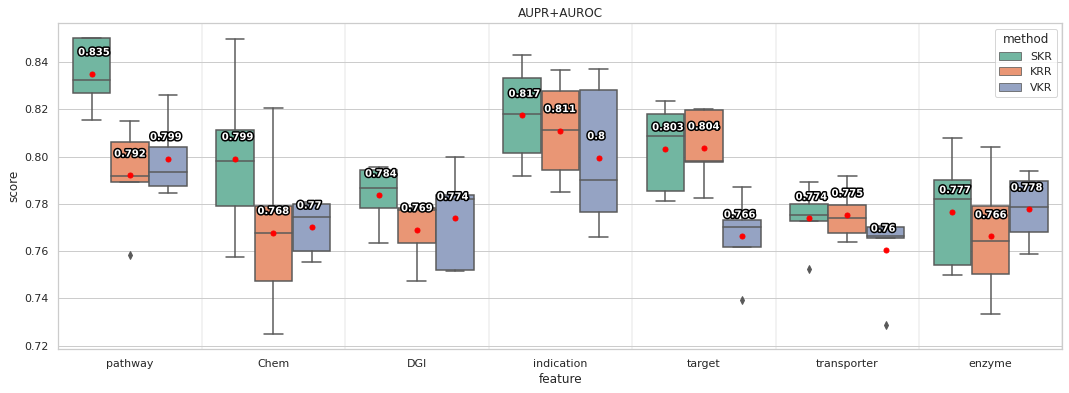

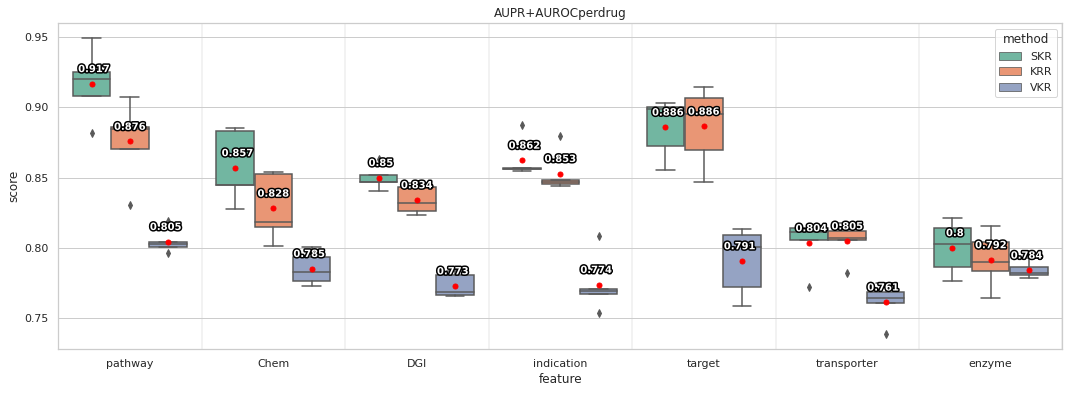

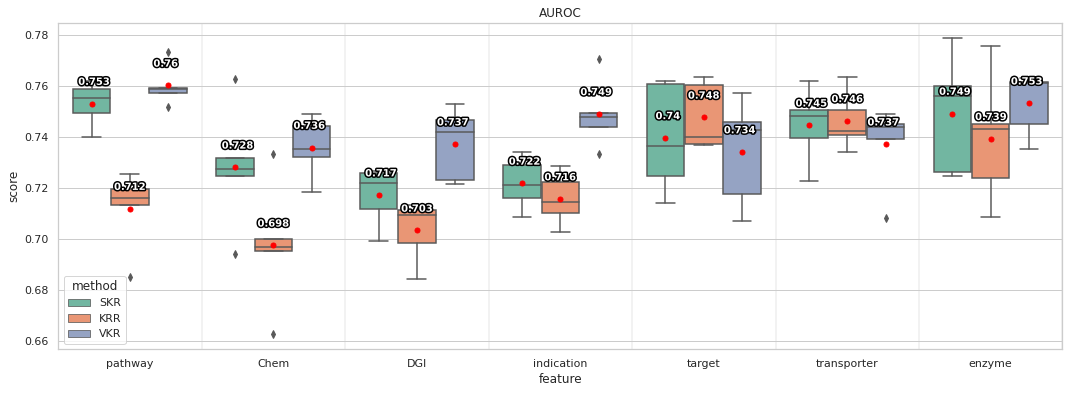

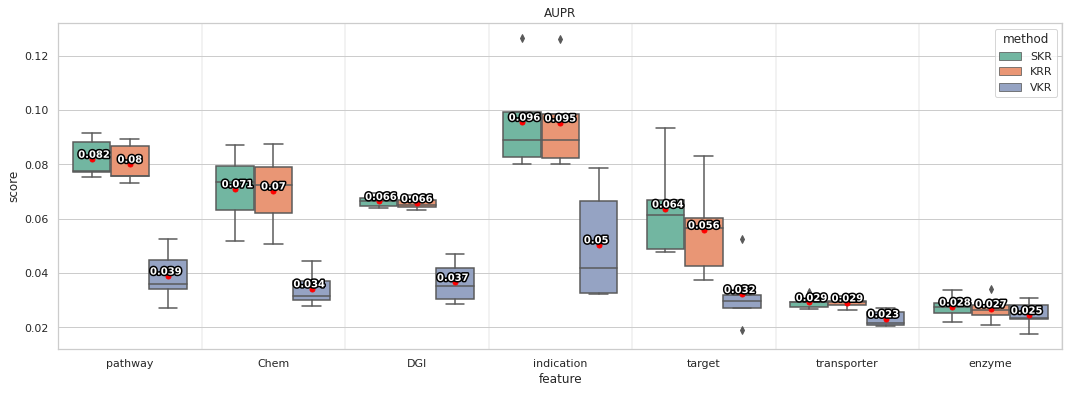

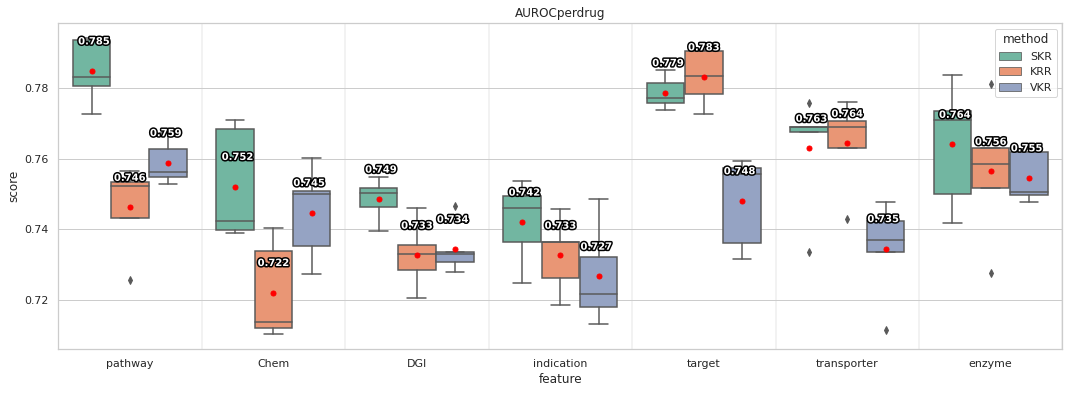

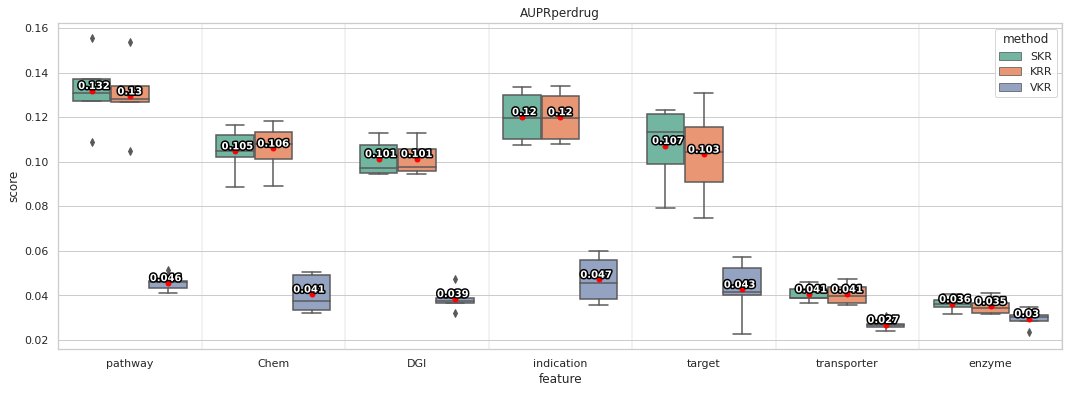

In [19]:
metrice_names = ["AUPR+AUROC", "AUPR+AUROCperdrug", "AUROC", "AUPR", "AUROCperdrug", "AUPRperdrug"]
methods = ["SKR", "KRR", "VKR"]

for metrice in metrice_names:
    # sns.set_style('white')
    plt.figure(figsize=(18, 6), dpi=350)

    sns.set_theme(rc={'figure.figsize':(18, 6)},style='whitegrid')
    # sns.axes_style("whitegrid")
    dfplot = df_sorted[df_sorted["metric"]==metrice]
    means = {}
    vertical_offset = dfplot['score'].mean() * 0.01
    ax = sns.boxplot(x = dfplot['feature'], 
                y = dfplot['score'], 
                hue = dfplot['method'], 
                palette = 'Set2',
                showmeans=True,
                meanprops={'marker':'o',
                           'markerfacecolor':'red', 
                           'markeredgecolor':'red',
                           'markersize':'5'}
                           )
    for method in methods:
        means[method] = dfplot[dfplot["method"]==method].groupby(['feature'])["score"].mean()
        i = -0.5

    for method in methods:
        i += 0.25
        for xtick in ax.get_xticks():
            text = ax.text(xtick + i, means[method][xtick] + vertical_offset, round(means[method][xtick], 3), 
                           horizontalalignment='center',size='small',color='white',weight='semibold')
            text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.grid(True, which='minor', color='black', lw=0.1)
    plt.title(metrice)
    plt.savefig(fname=f"figs/{metrice}_0_150.jpg", bbox_inches="tight")
    plt.show()